# Image Data IO
This tutorial explains how to prepare, load and train with image data in MXNet. All IO in MXNet is handled via `mx.io.DataIter` and its subclasses, which is explained [here](./data.ipynb). In this tutorial we focus on how to use pre-built data iterators as while as custom iterators to process image data.

There are mainly three ways of loading image data in MXNet:
- [NEW] mx.img.ImageIter: implemented in python, easily customizable, can load from both .rec files and raw image files.
- [OLD] mx.io.ImageRecordIter: implemented in backend (C++), less customizable but can be used in all language bindings, load from .rec files
- Custom iterator by inheriting mx.io.DataIter

First, we explain the record io file format used by mxnet:

## RecordIO
Record IO is the main file format used by MXNet for data IO. It supports reading and writing on various file systems including distributed file systems like Hadoop HDFS and AWS S3.
First, we download the Caltech 101 dataset that contains 101 classes of objects and convert them into record io format:

Setup:

In [1]:
%matplotlib inline
import os
import subprocess
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt

# change this to your mxnet location
MXNET_HOME = '/scratch/mxnet'

Download and unzip:

In [2]:
os.system('wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz -P data/')
os.chdir('data')
os.system('tar -xf 101_ObjectCategories.tar.gz')
os.chdir('../')

Let's take a look at the data. As you can see, under the [root folder](./data/101_ObjectCategories) every category has a [subfolder](./data/101_ObjectCategories/yin_yang).

Now let's convert them into record io format. First we need to make a list that contains all the image files and their categories:

In [2]:
os.system('python %s/tools/im2rec.py --list=1 --recursive=1 --shuffle=1 --test-ratio=0.2 data/caltech data/101_ObjectCategories'%MXNET_HOME)

0

The resulting [list file](./data/caltech_train.lst) is in the format `index\t(one or more label)\tpath`. In this case there is only one label for each image but you can modify the list to add in more for multi label training.

Then we can use this list to create our record io file:

In [3]:
os.system("python %s/tools/im2rec.py --num-thread=4 --pass-through=1 data/caltech data/101_ObjectCategories"%MXNET_HOME)

0

The record io files are now saved at [here](./data)

## ImageRecordIter
mx.io.ImageRecordIter can be used for loading image data saved in record io format. It is available in all frontend languages, but as it's implemented in C++, it is less flexible. 

To use ImageRecordIter, simply create an instance by loading your record file:

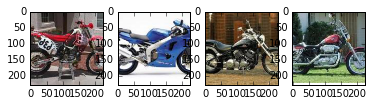

In [7]:
data_iter = mx.io.ImageRecordIter(
    path_imgrec="./data/caltech_train.rec", # the target record file
    data_shape=(3, 227, 227), # output data shape. An 227x227 region will be cropped from the original image.
    batch_size=4, # number of samples per batch
    resize=256 # resize the shorter edge to 256 before cropping
    # ... you can add more augumentation options here. use help(mx.io.ImageRecordIter) to see all possible choices
    )
data_iter.reset()
batch = data_iter.next()
data = batch.data[0]
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.show()

## Next Step
- [Record IO](record_io.ipynb) Read & Write RecordIO files with python interface
- [Advanced Image IO](advanced_img_io.ipynb) Advanced image IO for detection, segmentation, etc...